### Analysis of result from `State-evolution` `full_trajectories.json`

<img src = "plots/full_trajectories-82642c721dbd76cdb2633f06f66b4a74.png" style = "float: left;"><br style="clear:both" />
Scanning the amplitude of the homogeneous field on both sides of the quadrupole to see the effect on the exit probabilities, with a magnetic field of 0.5G in z direction. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from utils.grid_plot_trajectories import *

run_name = 'full_trajectories'

options_dir = 'options/'
results_dir = 'results/'
plots_dir = 'plots/'

results_fname = 'full_trajectories-82642c721dbd76cdb2633f06f66b4a74.txt'

In [3]:
with open(options_dir + f'{run_name}.json') as json_file:
    options = json.load(json_file)
    
with open(results_dir + results_fname) as results_file:
    results = np.loadtxt(results_file)
    
pickled_vars = {}
for key, fname in options['pickle_fnames'].items():
    fname = options_dir + fname.split('/')[-1]
    with open(fname, 'rb') as f:
        pickled_vars[key] = pickle.load(f)

In [4]:
import pandas as pd
df = pd.DataFrame(results)
grouped_homogeneous_scaled = df.groupby(2)

In [5]:
time_eval = 0

grouped_data = {}
for group in grouped_homogeneous_scaled.groups.keys():
    group_data = grouped_homogeneous_scaled.get_group(group).values[:,1:]
    data = np.empty([group_data.shape[0], 3])
    for idx, traj_idx in enumerate(group_data[:,0].astype(int)):
        traj = pickled_vars['trajectories'][traj_idx]
        data[idx,:] = (traj[0](time_eval), traj[1](time_eval), group_data[idx, 1])
    grouped_data[group] = data

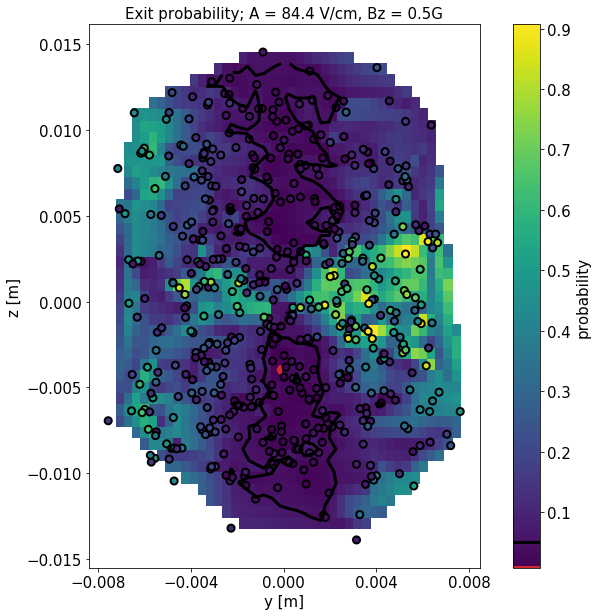

In [6]:
group = 1
data = grouped_homogeneous_scaled.get_group(group).values
plot_grid_trajectories(np.array(pickled_vars['trajectories'])[data[:,1].astype(int)],data[:,-1],
                       parameters = {'val': f'A = {84.4*group} V/cm, Bz = 0.5G', 'width':14})

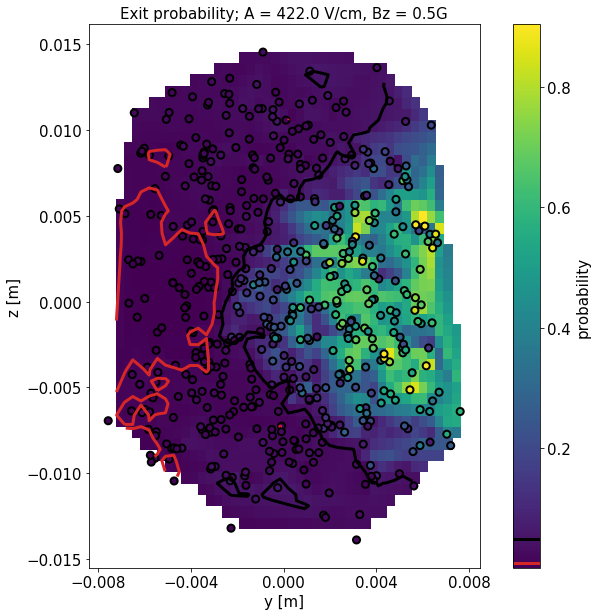

In [7]:
group = 5
data = grouped_homogeneous_scaled.get_group(group).values
plot_grid_trajectories(np.array(pickled_vars['trajectories'])[data[:,1].astype(int)],data[:,-1], 
                       parameters = {'val': f'A = {84.4*group} V/cm, Bz = 0.5G', 'width':14})

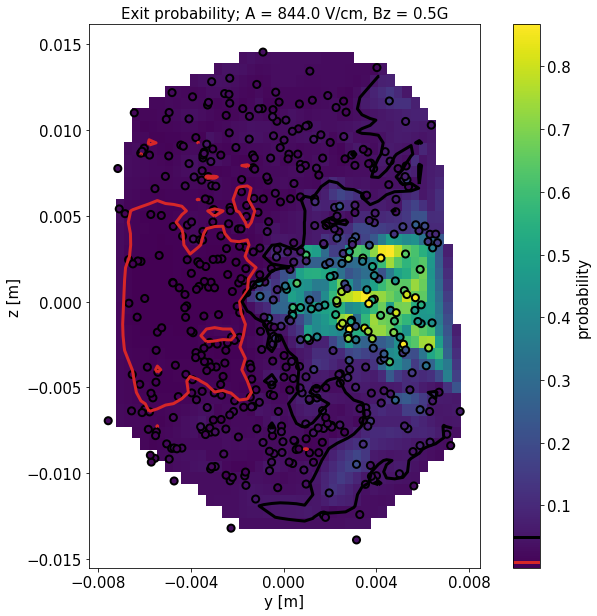

In [21]:
group = 10
data = grouped_homogeneous_scaled.get_group(group).values
plot_grid_trajectories(np.array(pickled_vars['trajectories'])[data[:,1].astype(int)],data[:,-1], 
                       parameters = {'val': f'A = {84.4*group} V/cm, Bz = 0.5G', 'width':14})

In [8]:
%%capture
from utils.animated_grid_plot_trajectories import *

plot_levels = [0.01, 0.05]
parameter = {'val': "f'A = {84.4*group:.1f} V/cm, Bz = 0.5G'", 'width':25}

ani = AnimatedGridPlot(np.array(pickled_vars['trajectories']), grouped_homogeneous_scaled, plot_levels,
                 parameter)
ani.create_animation('videos/scan_homogeneous_field_strength_z.mp4')

<video controls autoplay loop src="videos/scan_homogeneous_field_strength_z.mp4" />